## K-means clustering

With K-means clustering it is possible to group similar data points together and discover underlying patterns. K-means looks for a set number of clusters (K) in a dataset. 

The target number k will be defined, which refers to the number of centroids that are needed in the dataset. A centroid is the location that represents the center of the cluster. The centroid of every cluster will be a red dot.

**Libraries needed**

In [19]:
import tkinter as tk #This will help creating a root where a file can be opened
from tkinter import filedialog 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

The unique dataset that has been generated earlier will now be imported.

In [20]:
Data = pd.read_csv("participant_data_unique.csv") #The generated data set that is created earlier
Data.head(10)

name   A   B
0      Sonji  81   5
1    Mariann  28   5
2      Regan  30  52
3       Doss  54  87
4        Les  31  10
5       Tera  47  68
6  Mansfield  13   4
7    Eustace  62  59
8      Darin  59  94
9     Aditya  30  25

In [22]:
df = DataFrame(Data,columns=['A','B']) #The columns that are included

In [23]:
from pandas import DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #The KMeans algorithm

kmeans = KMeans(n_clusters=15).fit(df)
centroids = kmeans.cluster_centers_
print(centroids) #The X- and Y axis of the centroids

[[59.66666667  9.66666667]
 [44.2        65.        ]
 [33.8         7.8       ]
 [95.         74.        ]
 [17.         75.75      ]
 [81.33333333 66.66666667]
 [55.33333333 87.33333333]
 [ 4.5        51.5       ]
 [13.          6.        ]
 [31.5        48.5       ]
 [78.5         5.        ]
 [83.33333333 88.        ]
 [28.         99.        ]
 [64.75       54.25      ]
 [36.         27.5       ]]


In [24]:
df['cluster'] = kmeans.fit_predict(df[['A', 'B']]) #Every participant will have their cluster assigned
df.head(8)

A   B  cluster
0  81   5        4
1  28   5        0
2  30  52        2
3  54  87        5
4  31  10        0
5  47  68        7
6  13   4       12
7  62  59       10

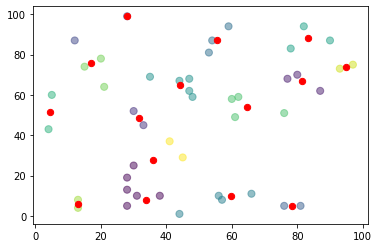

In [25]:
plt.scatter(df['A'], df['B'], c= kmeans.labels_.astype(float), s=50, alpha=0.5) #This plots all the datapoints
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40)
plt.show()

By running the following cell, a second screen will open to open an Excel file. The file 'participant_data_excel.xlsx' can be opened to experiment.

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300,  relief = 'raised')
canvas1.pack()
label1 = tk.Label(root, text='Matched Clustering')
label1.config(font=('avenir', 14, 'bold'))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Enter the number of clusters:')
label2.config(font=('avenir', 10, 'bold'))
canvas1.create_window(200, 120, window=label2)
entry1 = tk.Entry (root) 
canvas1.create_window(200, 140, window=entry1)

def getExcel ():
    
    global df
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_excel (import_file_path)
    df = DataFrame(read_file,columns=['x','y'])  
    
browseButtonExcel = tk.Button(text=" Import Excel File ", command=getExcel, bg='green', fg='blue', font=('avenir', 10, 'bold'))
canvas1.create_window(200, 70, window=browseButtonExcel)

def getKMeans ():
    global df
    global numberOfClusters
    numberOfClusters = int(entry1.get())
    
    kmeans = KMeans(n_clusters=numberOfClusters).fit(df)
    centroids = kmeans.cluster_centers_
    
    label3 = tk.Label(root, text= centroids)
    canvas1.create_window(200, 250, window=label3)
    
    figure1 = plt.Figure(figsize=(4,3), dpi=100)
    ax1 = figure1.add_subplot(111)
    ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    scatter1 = FigureCanvasTkAgg(figure1, root) 
    scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
    
processButton = tk.Button(text=' View Matched Clusters ', command=getKMeans, bg='brown', fg='blue', font=('avenir', 12, 'bold'))
canvas1.create_window(200, 170, window=processButton)

root.mainloop()